In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/restaurant_menu_optimization_data.csv')
print(data.head())

  RestaurantID MenuCategory               MenuItem  \
0         R003    Beverages                   Soda   
1         R001   Appetizers  Spinach Artichoke Dip   
2         R003     Desserts    New York Cheesecake   
3         R003  Main Course        Chicken Alfredo   
4         R002  Main Course          Grilled Steak   

                                         Ingredients  Price Profitability  
0                                   ['confidential']   2.55           Low  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.12        Medium  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.66          High  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  29.55          High  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  17.73        Medium  


In [5]:
print(data.tail())

    RestaurantID MenuCategory            MenuItem  \
995         R003    Beverages                Soda   
996         R001   Appetizers       Caprese Salad   
997         R003  Main Course  Vegetable Stir-Fry   
998         R002     Desserts            Tiramisu   
999         R001    Beverages                Soda   

                                           Ingredients  Price Profitability  
995                                   ['confidential']   2.16           Low  
996       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.86        Medium  
997  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  20.57          High  
998           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.80          High  
999                                   ['confidential']   4.26        Medium  


In [6]:
data.shape

(1000, 6)

            Price
count  1000.00000
mean     12.81801
std       7.41713
min       2.01000
25%       4.86750
50%      12.53500
75%      17.69000
max      29.84000


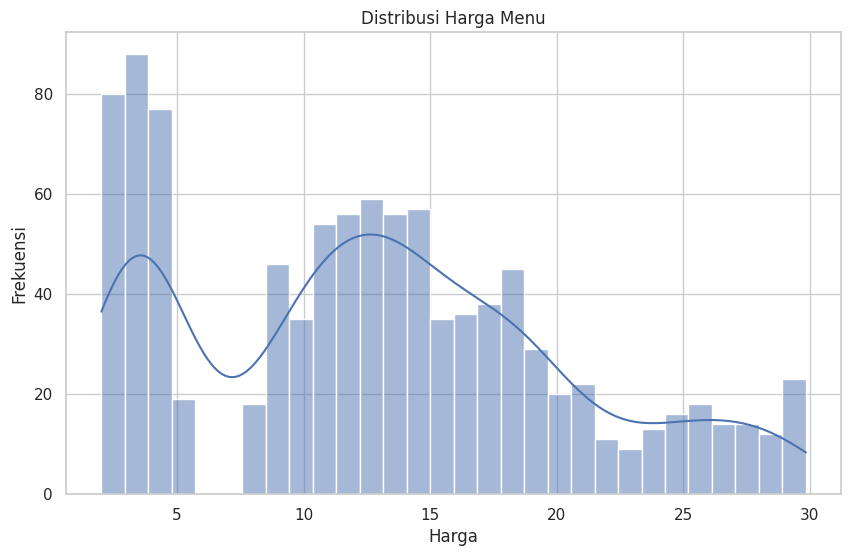

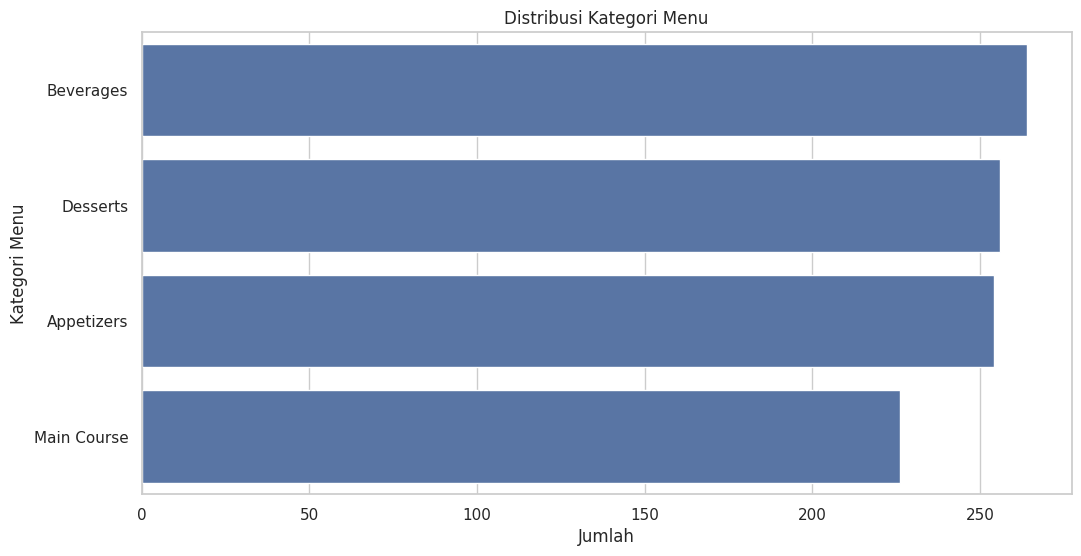

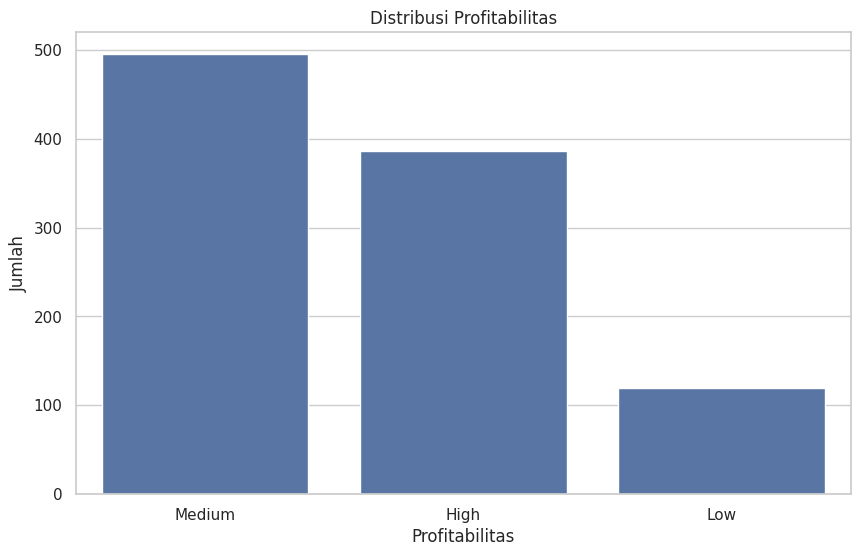

In [7]:
# Melihat statistik deskriptif
descriptive_stats = data.describe()
print(descriptive_stats)

# Visualisasi distribusi harga
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Menu')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi distribusi kategori menu
plt.figure(figsize=(12, 6))
sns.countplot(y='MenuCategory', data=data, order=data['MenuCategory'].value_counts().index)
plt.title('Distribusi Kategori Menu')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Menu')
plt.show()

# Visualisasi distribusi profitabilitas
plt.figure(figsize=(10, 6))
sns.countplot(x='Profitability', data=data, order=data['Profitability'].value_counts().index)
plt.title('Distribusi Profitabilitas')
plt.xlabel('Profitabilitas')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [8]:
df=data.drop(columns=['RestaurantID'])
df

,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,Beverages,Soda,['confidential'],2.55,Low
1,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...
995,Beverages,Soda,['confidential'],2.16,Low
996,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [9]:
df.duplicated().sum()

50

In [10]:
df=df.drop_duplicates()

In [11]:
df.isna().sum()

MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

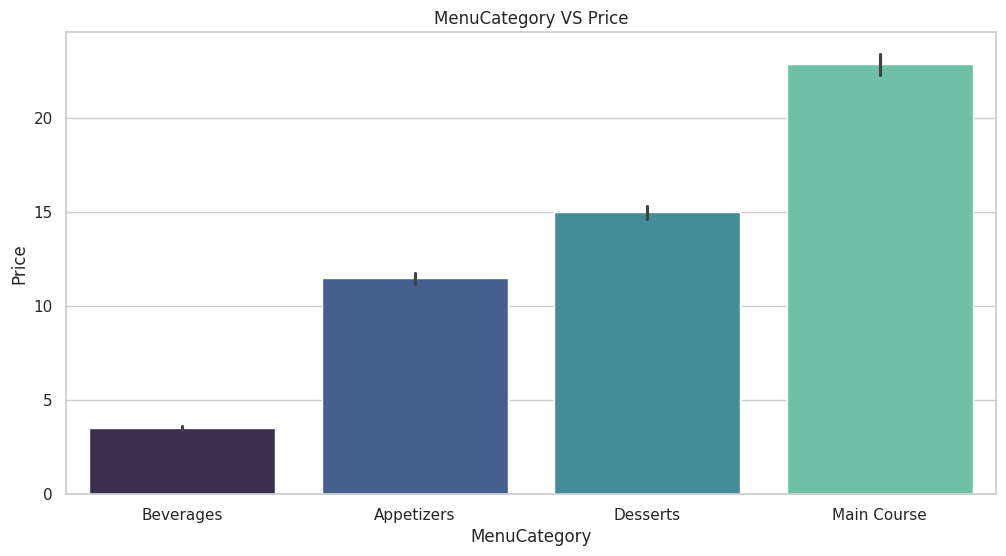

In [12]:
plt.figure(figsize=(12, 6))

sns.barplot(x='MenuCategory', y='Price',data=df ,palette='mako')
plt.title('MenuCategory VS Price')
plt.show()

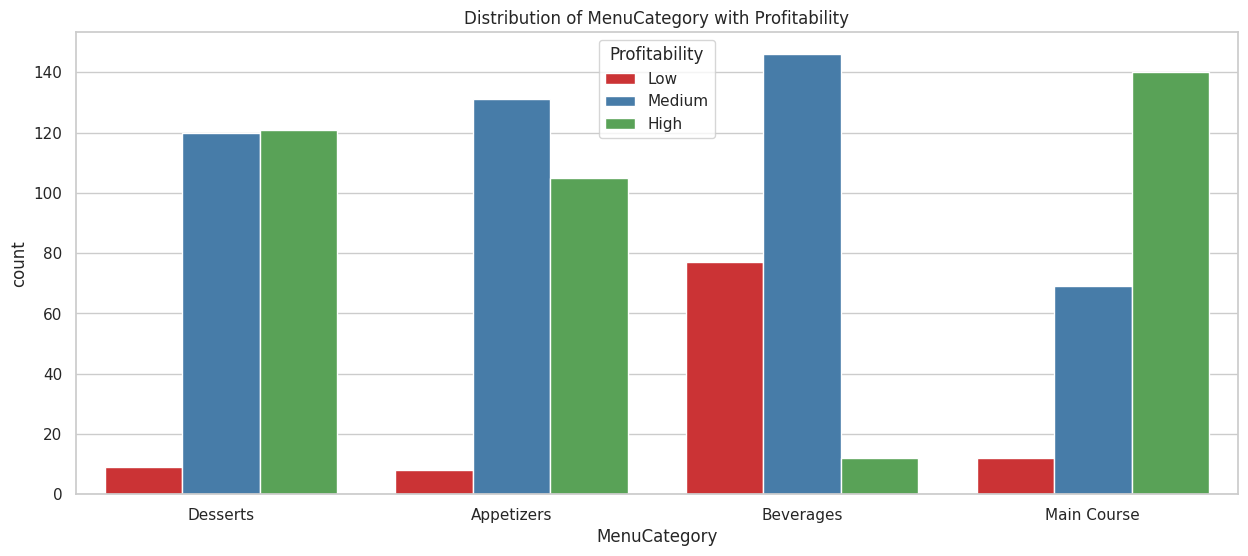

In [13]:
plt.figure(figsize=(15, 6))

sns.countplot(x='MenuCategory', order=df['MenuCategory'].value_counts().index, data=df, hue='Profitability', palette='Set1')
plt.title('Distribution of MenuCategory with Profitability')
plt.show()

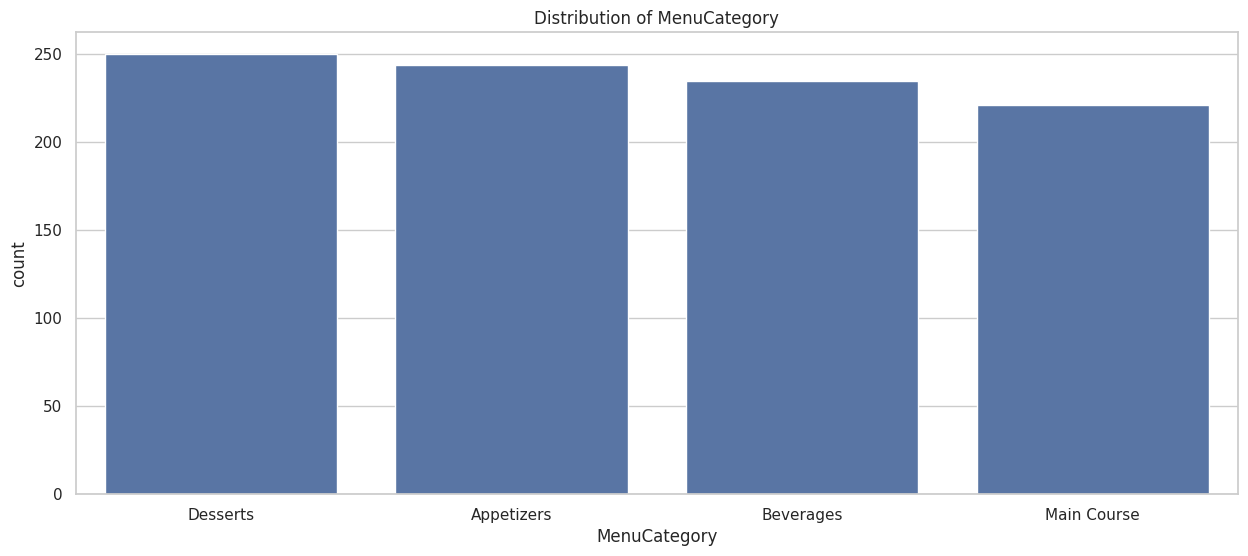

In [14]:
plt.figure(figsize=(15, 6))

sns.countplot(x='MenuCategory', order=df['MenuCategory'].value_counts().index, data=df)
plt.title('Distribution of MenuCategory')
plt.show()

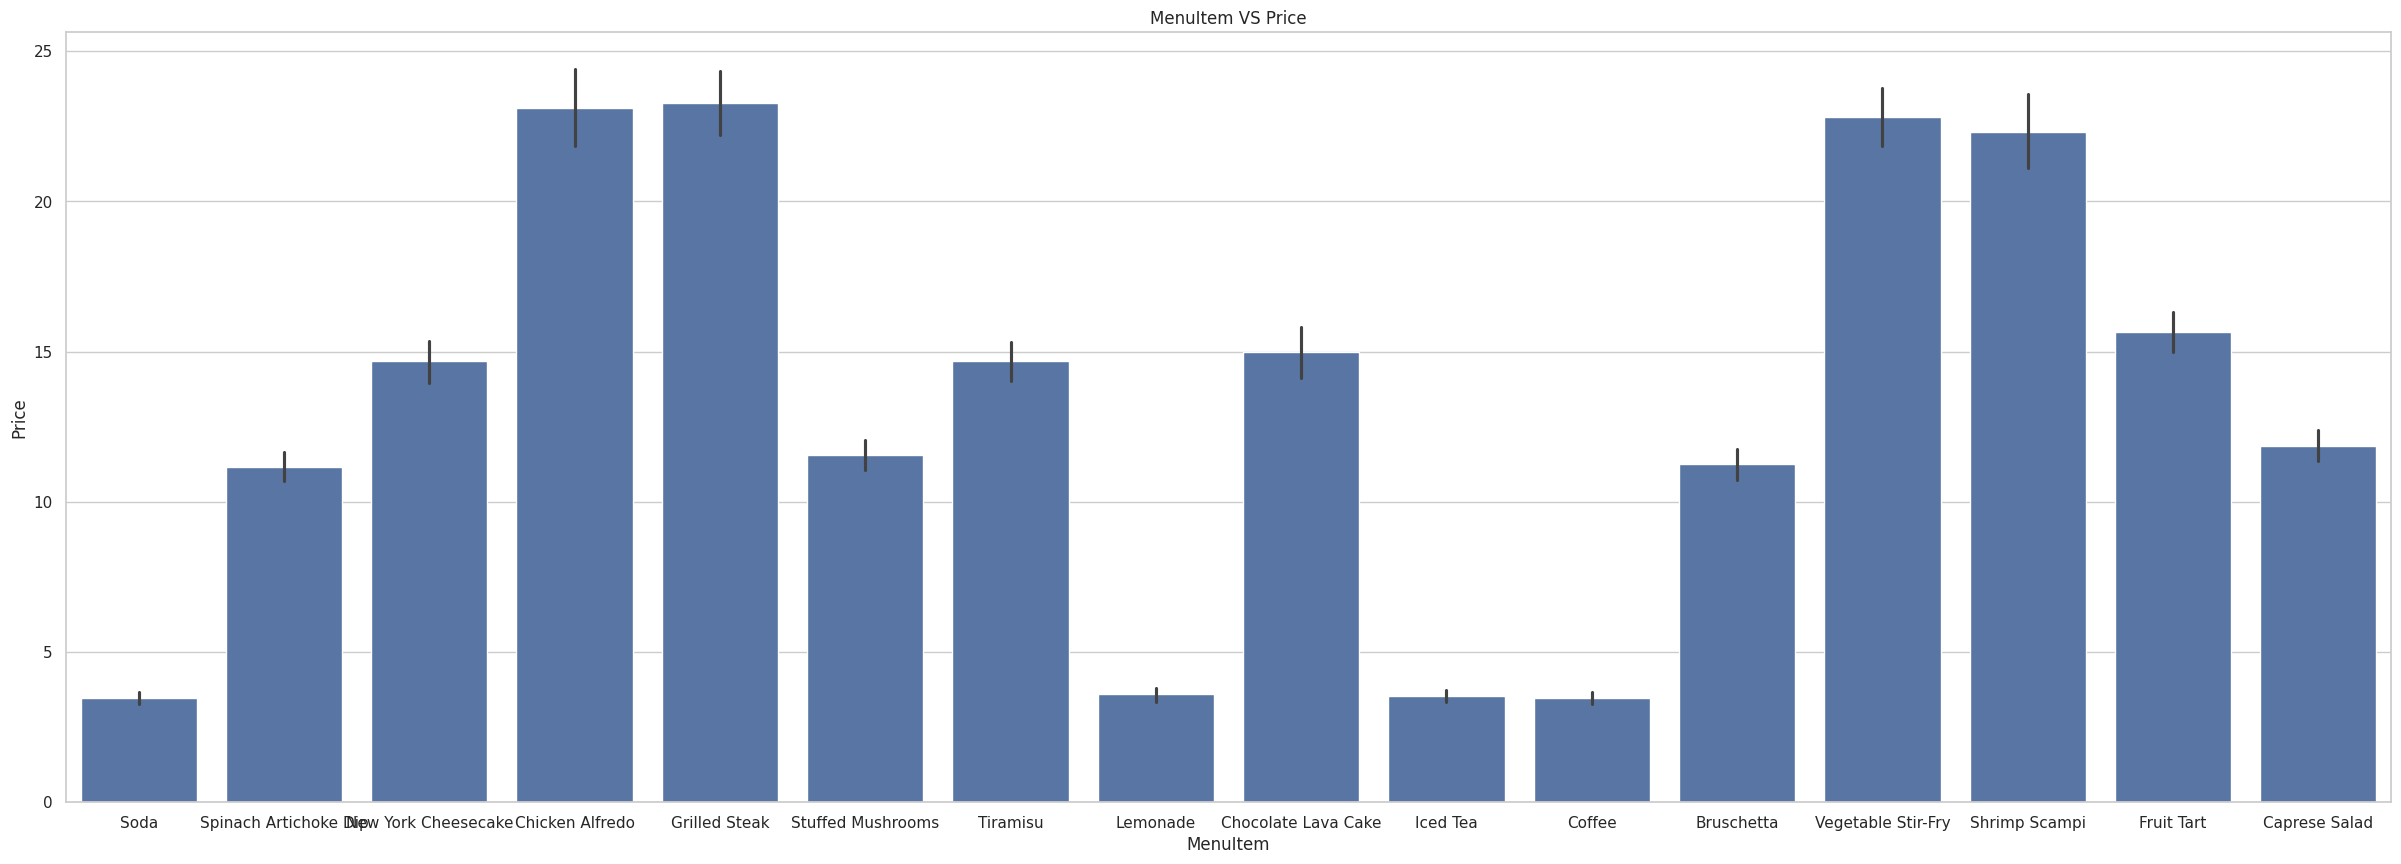

In [15]:
plt.figure(figsize=(30, 10))

sns.barplot(x='MenuItem', y='Price',data=df )
plt.title('MenuItem VS Price')
plt.show()

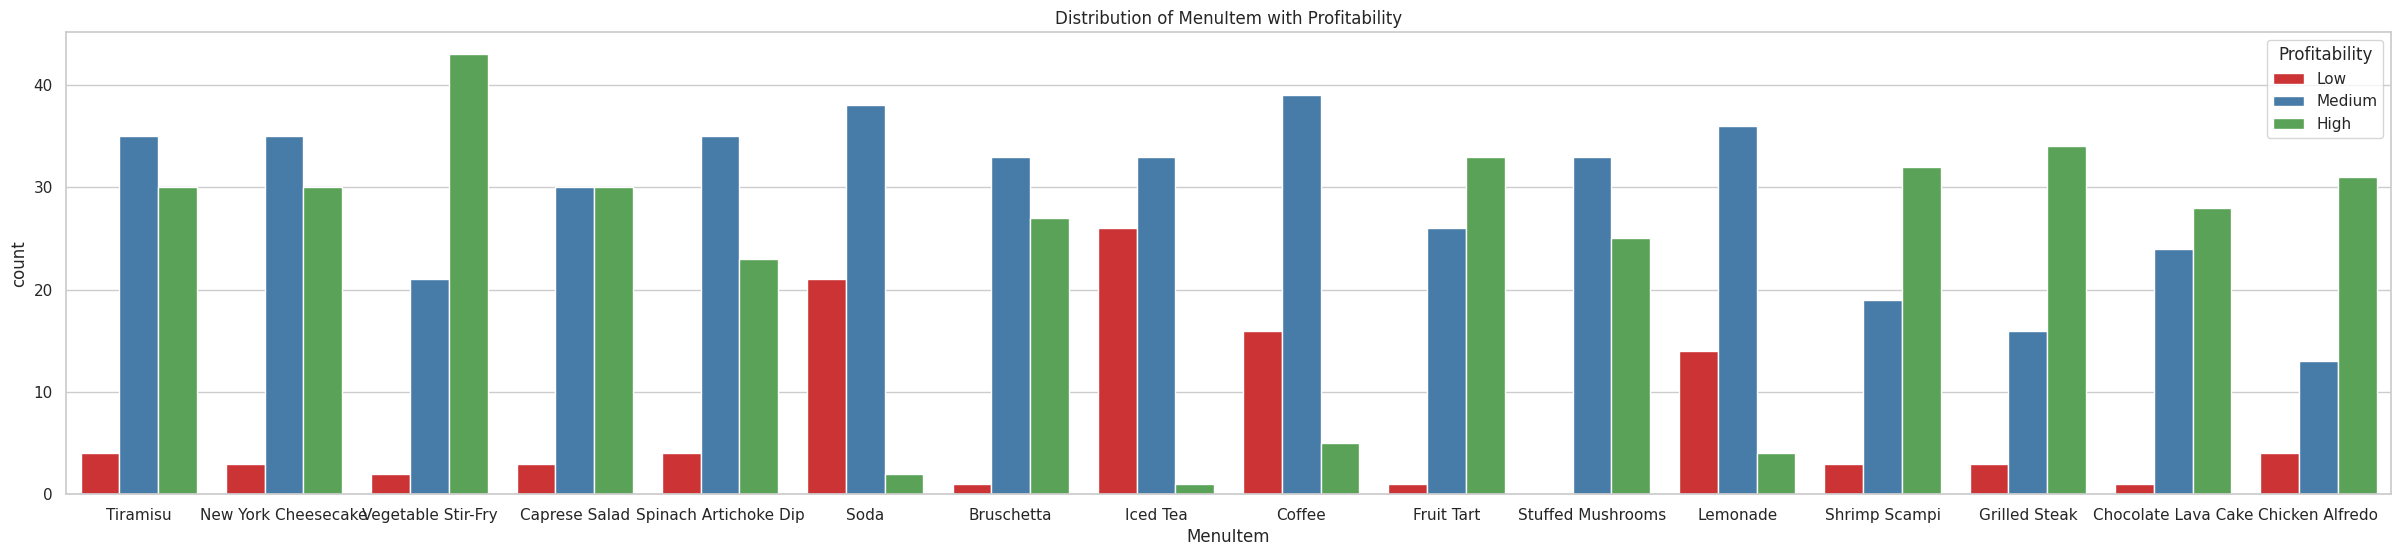

In [16]:
plt.figure(figsize=(30, 6))

sns.countplot(x='MenuItem', order=df['MenuItem'].value_counts().index, data=df, hue='Profitability', palette='Set1')
plt.title('Distribution of MenuItem with Profitability')
plt.show()

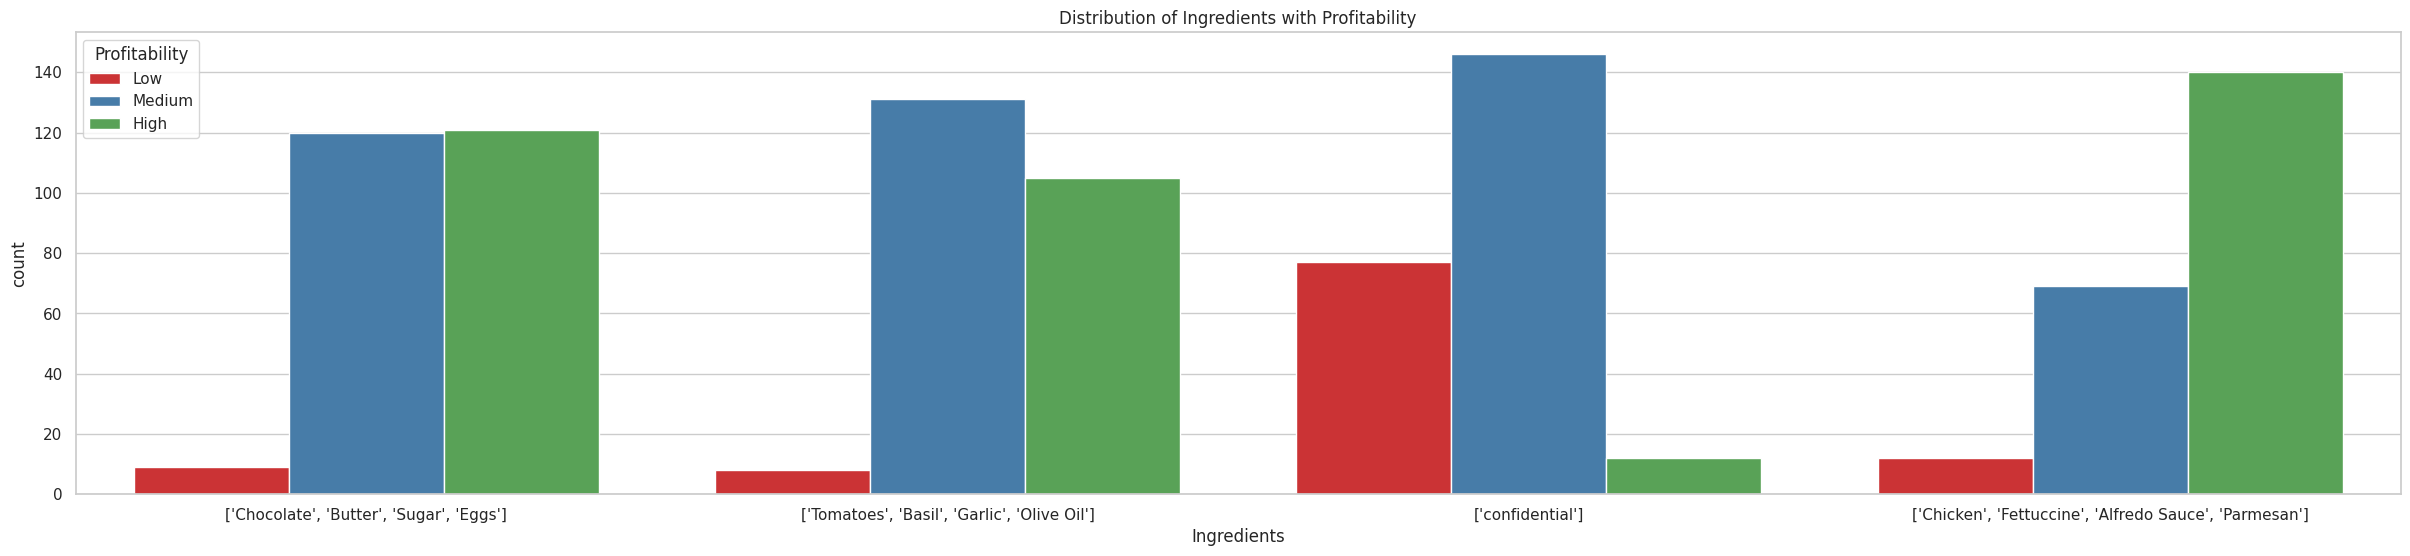

In [17]:
plt.figure(figsize=(30, 6))

sns.countplot(x='Ingredients', order=df['Ingredients'].value_counts().index, data=df, hue='Profitability', palette='Set1')
plt.title('Distribution of Ingredients with Profitability')
plt.show()

In [18]:
#encoding
le = LabelEncoder()

df['MenuCategory'] = le.fit_transform(df['MenuCategory'])
df['MenuItem'] = le.fit_transform(df['MenuItem'])
df['Ingredients'] = le.fit_transform(df['Ingredients'])
df['Profitability'] = le.fit_transform(df['Profitability'])

In [19]:
#split
#target column
target_column = 'Profitability'

X = df.drop(columns=[target_column]) # -> features all features without target
y = df[target_column]

In [23]:
# Import the necessary module
from sklearn.model_selection import train_test_split

#split
#target column
target_column = 'Profitability'

X = df.drop(columns=[target_column]) # -> features all features without target
y = df[target_column]

# Ensure X and y have the same number of samples
X = X.iloc[:len(y)]
# Now you can safely split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# Initialize and train Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict on test data
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate Random Forest
print("Random Forest:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Random Forest:
Accuracy Score: 0.8947368421052632
Confusion Matrix:
 [[64  4  6]
 [ 2 13  3]
 [ 4  1 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89        74
           1       0.72      0.72      0.72        18
           2       0.91      0.95      0.93        98

    accuracy                           0.89       190
   macro avg       0.85      0.85      0.85       190
weighted avg       0.89      0.89      0.89       190



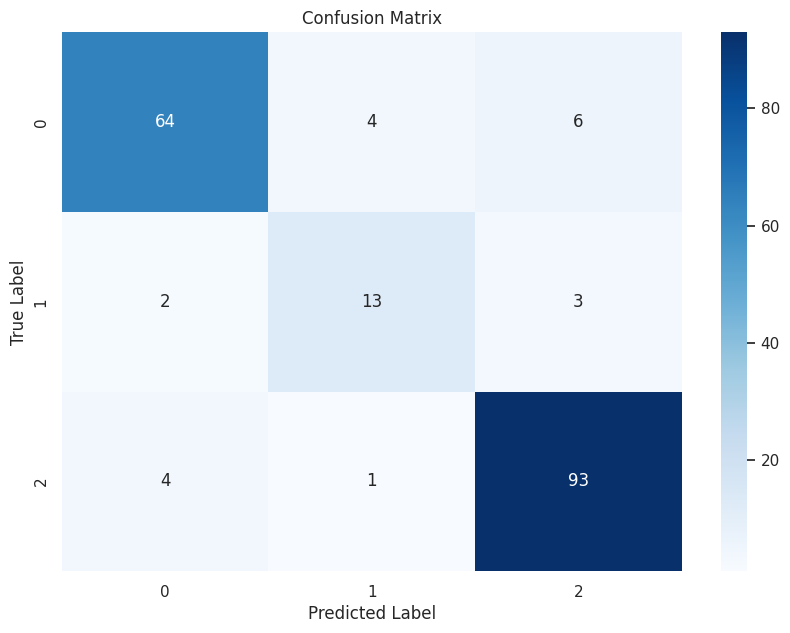

In [25]:
# Generate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_random_forest, labels=random_forest.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

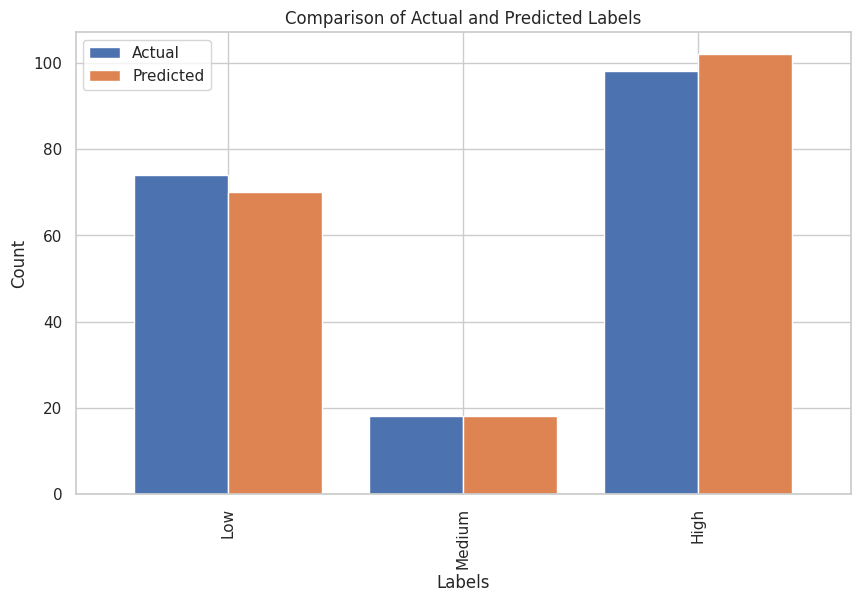

In [26]:
actual_labels = y_test
predicted_labels = y_pred_random_forest

# Calculate counts of each label
actual_counts = pd.Series(actual_labels).value_counts().sort_index()
predicted_counts = pd.Series(predicted_labels).value_counts().sort_index()

# Create a DataFrame to align actual and predicted counts for plotting
comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

# Plotting
ax = comparison_df.plot(kind='bar', width=0.8, figsize=(10, 6))

# Customizing x-axis labels to match the actual label names
ax.set_xticklabels(['Low', 'Medium', 'High'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Labels')
plt.legend()
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Definisikan parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Inisialisasi Random Forest dan GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [47]:
# Ambil model terbaik dari GridSearchCV
best_rf = grid_search_rf.best_estimator_

# Prediksi pada data uji
y_pred_random_forest = best_rf.predict(X_test)

# Evaluasi Random Forest
print("Random Forest (Tuned):")
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))


Random Forest (Tuned):
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score: 0.93
Confusion Matrix:
 [[31  0  1]
 [ 0 77  6]
 [ 4  3 78]]
Classification Report:
               precision    recall  f1-score   support

        High       0.89      0.97      0.93        32
         Low       0.96      0.93      0.94        83
      Medium       0.92      0.92      0.92        85

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Memuat dataset
restoran = pd.read_csv('restaurant_menu_optimization_data.csv')
X = restoran.drop(columns=['Profitability'])
Y = restoran[['Profitability']]

# Identifikasi kolom yang berisi data string
string_columns = X.select_dtypes(include=['object']).columns

# Lakukan Label Encoding untuk kolom string
label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Menormalkan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[ 1.23853913  1.41981299 -1.20760013 -1.41981299  2.15174967]
 [ 0.03607396  1.41981299 -1.20760013 -1.41981299  1.59435839]
 [ 0.03607396 -1.30622795 -1.42218922  0.39754764  0.15026959]
 ...
 [-1.16639122  1.41981299  0.50911263 -1.41981299  1.92501424]
 [ 0.03607396 -0.39754764  0.07993444  1.30622795 -1.3613    ]
 [ 0.03607396 -0.39754764  0.07993444  1.30622795 -1.3181123 ]]
[[ 0.03607396  0.51113268  1.367469   -0.51113268 -0.14529625]
 [-1.16639122  1.41981299 -0.34924375 -1.41981299  0.63478162]
 [ 1.23853913 -1.30622795  0.93829081  0.39754764 -0.399024  ]
 [ 0.03607396  1.41981299  1.5820581  -1.41981299  2.0505285 ]
 [ 1.23853913 -0.39754764 -0.13465466  1.30622795 -1.13051572]
 [ 0.03607396  1.41981299  0.50911263 -1.41981299  0.46607966]
 [ 1.23853913 -0.39754764 -0.13465466  1.30622795 -1.42203271]
 [ 0.03607396  1.41981299  0.50911263 -1.41981299  1.13683866]
 [ 0.03607396 -0.39754764  0.07993444  1.30622795 -1.11297071]
 [ 1.23853913 -1.30622795 -1.42218922  0.39754764

In [28]:
from sklearn import metrics


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_knn))

0.875


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Add confusion_matrix to the import statement

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn) # This line was causing the error

print(f'KNN Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)



KNN Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.92      0.89        77
         Low       0.93      0.52      0.67        25
      Medium       0.88      0.93      0.91        98

    accuracy                           0.88       200
   macro avg       0.89      0.79      0.82       200
weighted avg       0.88      0.88      0.87       200

Confusion Matrix:
[[71  1  5]
 [ 5 13  7]
 [ 7  0 91]]


In [49]:
# Definisikan parameter grid untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# Inisialisasi model KNN dan GridSearchCV
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [50]:
# Ambil model terbaik dari GridSearchCV
best_knn = grid_search_knn.best_estimator_

# Prediksi pada data uji
y_pred_knn = best_knn.predict(X_test)

# Evaluasi KNN
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print(f'KNN Accuracy (Tuned): {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)
print("Best Parameters:", grid_search_knn.best_params_)


KNN Accuracy (Tuned): 0.93
Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.97      0.93        32
         Low       0.96      0.93      0.94        83
      Medium       0.92      0.92      0.92        85

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix:
[[31  0  1]
 [ 0 77  6]
 [ 4  3 78]]
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


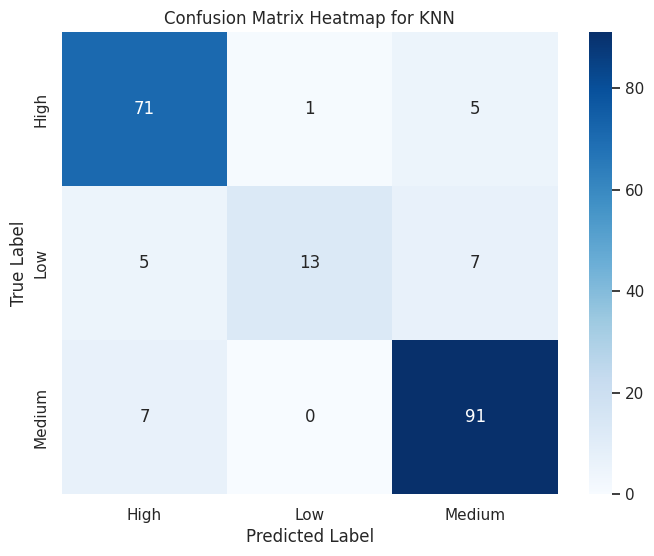

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan confusion matrix untuk KNN
conf_matrix_knn = np.array([[71, 1, 5],
                            [5, 13, 7],
                            [7, 0, 91]])

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for KNN')
plt.show()


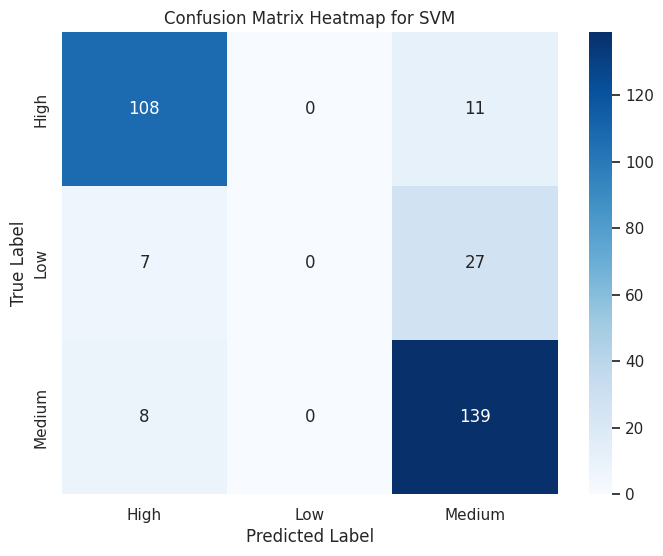

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Definisikan confusion matrix dari hasil SVM
conf_matrix = np.array([[108, 0, 11],
                        [7, 0, 27],
                        [8, 0, 139]])

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for SVM')
plt.show()


In [34]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Misalnya y_test dan y_pred_knn berisi data string
label_encoder = LabelEncoder()

# Encode target
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_knn_encoded = label_encoder.transform(y_pred_knn)

# Hitung metrik
mae = mean_absolute_error(y_test_encoded, y_pred_knn_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_knn_encoded)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_encoded, y_pred_knn_encoded)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 0.185
Mean Squared Error (MSE): 0.305
Root Mean Squared Error (RMSE): 0.552268050859363
R-squared (R²): 0.6469805260568882


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# Train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [37]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)

In [39]:
# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

SVM Accuracy: 0.815
Confusion Matrix:
[[71  0  6]
 [ 5  0 20]
 [ 6  0 92]]
Classification Report:
              precision    recall  f1-score   support

        High       0.87      0.92      0.89        77
         Low       0.00      0.00      0.00        25
      Medium       0.78      0.94      0.85        98

    accuracy                           0.81       200
   macro avg       0.55      0.62      0.58       200
weighted avg       0.72      0.81      0.76       200



In [52]:
# Definisikan parameter grid untuk SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
# Inisialisasi model SVM dan GridSearchCV
svm = SVC(probability=True)  # probability=True agar kita bisa mendapatkan probabilitas prediksi
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [53]:
# Ambil model terbaik dari GridSearchCV
best_svm = grid_search_svm.best_estimator_

# Prediksi pada data uji
y_pred_svm = best_svm.predict(X_test)

# Evaluasi SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy (Tuned): {svm_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print("Best Parameters:", grid_search_svm.best_params_)


SVM Accuracy (Tuned): 0.93
Confusion Matrix:
[[31  0  1]
 [ 0 77  6]
 [ 4  3 78]]
Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.97      0.93        32
         Low       0.96      0.93      0.94        83
      Medium       0.92      0.92      0.92        85

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [40]:
import pandas as pd
import ast
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load data
data = pd.read_csv('/content/restaurant_menu_optimization_data.csv')

# Preprocessing Ingredients: convert string representation of list to actual list
data['Ingredients'] = data['Ingredients'].apply(ast.literal_eval)

# One-Hot Encoding for MenuCategory
one_hot_encoder = OneHotEncoder()
menu_category_encoded = one_hot_encoder.fit_transform(data[['MenuCategory']]).toarray()

# Convert to DataFrame and add to original data
menu_category_df = pd.DataFrame(menu_category_encoded, columns=one_hot_encoder.get_feature_names_out(['MenuCategory']))
data_encoded = pd.concat([data, menu_category_df], axis=1)

# Label Encoding for Profitability
label_encoder = LabelEncoder()
data_encoded['Profitability'] = label_encoder.fit_transform(data_encoded['Profitability'])

# Standardize the Price column
scaler = StandardScaler()
data_encoded['Price'] = scaler.fit_transform(data_encoded[['Price']])

# Define the bins and labels for categorization
bins = [-float('inf'), -1, 0, 1]  # Adjust bins according to the actual price ranges
labels = ['Low', 'Medium', 'High']

# Categorize Price
data_encoded['PriceCategory'] = pd.cut(data_encoded['Price'], bins=len(labels), labels=labels)

# Drop original categorical columns that were encoded
data_encoded = data_encoded.drop(columns=['MenuCategory', 'MenuItem', 'Ingredients', 'RestaurantID'])

# Pisahkan fitur dan target
X = data_encoded.drop(columns=['Price', 'PriceCategory'])
y = data_encoded['PriceCategory']

# Pisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
rf_accuracy = rf_scores.mean()
rf_std = rf_scores.std()
rf_y_pred = rf_classifier.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)

# Inisialisasi model K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_scores = cross_val_score(knn_classifier, X, y, cv=5, scoring='accuracy')
knn_accuracy = knn_scores.mean()
knn_std = knn_scores.std()
knn_y_pred = knn_classifier.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred, output_dict=True)

# Inisialisasi model Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
svm_scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
svm_accuracy = svm_scores.mean()
svm_std = svm_scores.std()
svm_y_pred = svm_classifier.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred, output_dict=True)

# Buat dictionary untuk menyimpan hasil evaluasi
results = {
    'Model': ['Random Forest', 'K-Nearest Neighbors', 'SVM'],
    'Cross-Validation Accuracy Mean': [rf_accuracy, knn_accuracy, svm_accuracy],
    'Cross-Validation Accuracy Std': [rf_std, knn_std, svm_std],
    'Test Accuracy': [rf_test_accuracy, knn_test_accuracy, svm_test_accuracy],
    'Precision (macro avg)': [rf_report['macro avg']['precision'], knn_report['macro avg']['precision'], svm_report['macro avg']['precision']],
    'Recall (macro avg)': [rf_report['macro avg']['recall'], knn_report['macro avg']['recall'], svm_report['macro avg']['recall']],
    'F1-score (macro avg)': [rf_report['macro avg']['f1-score'], knn_report['macro avg']['f1-score'], svm_report['macro avg']['f1-score']]
}

# Buat DataFrame dari dictionary
results_df = pd.DataFrame(results)

# Tampilkan hasil
print(results_df)

# Confusion Matrix untuk setiap model
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("K-Nearest Neighbors Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))


                 Model  Cross-Validation Accuracy Mean  \
0        Random Forest                           0.922   
1  K-Nearest Neighbors                           0.919   
2                  SVM                           0.922   

   Cross-Validation Accuracy Std  Test Accuracy  Precision (macro avg)  \
0                       0.008124           0.93               0.921954   
1                       0.010677           0.93               0.921954   
2                       0.012884           0.92               0.917789   

   Recall (macro avg)  F1-score (macro avg)  
0            0.938036              0.929268  
1            0.938036              0.929268  
2            0.910708              0.913907  
Random Forest Confusion Matrix:
 [[31  0  1]
 [ 0 77  6]
 [ 4  3 78]]
K-Nearest Neighbors Confusion Matrix:
 [[31  0  1]
 [ 0 77  6]
 [ 4  3 78]]
SVM Confusion Matrix:
 [[28  0  4]
 [ 0 77  6]
 [ 3  3 79]]


In [57]:
from sklearn.model_selection import cross_val_score
# Cross-validation scores untuk setiap model
rf_cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
knn_cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
svm_cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5, scoring='accuracy')

# Hasil cross-validation
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("SVM Cross-Validation Scores:", svm_cv_scores)


Random Forest Cross-Validation Scores: [0.9    0.95   0.9125 0.9125 0.925 ]
KNN Cross-Validation Scores: [0.9    0.95   0.9125 0.9125 0.925 ]
SVM Cross-Validation Scores: [0.9    0.95   0.9125 0.9125 0.925 ]


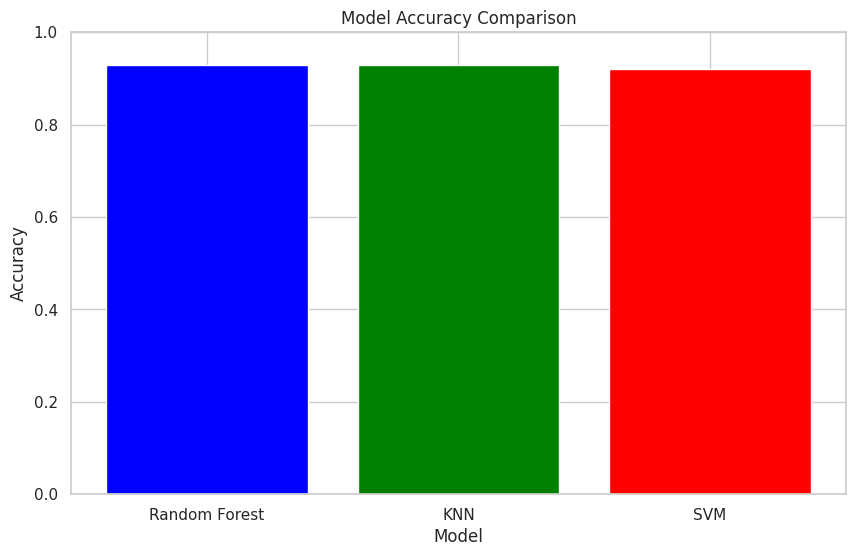

In [42]:
# Calculate accuracy for each model
from sklearn.metrics import accuracy_score

# Ensure that y_pred_random_forest is generated with the correct dimensions
y_pred_random_forest = rf_classifier.predict(X_test)

accuracy_RF =  accuracy_score(y_test, y_pred_random_forest)
# Generate predictions for KNN and SVM using X_test
y_pred_knn = knn_classifier.predict(X_test) # Use X_test for prediction
y_pred_svm = svm_classifier.predict(X_test) # Use X_test for prediction
accuracy_KNN = accuracy_score(y_test, y_pred_knn)
accuracy_SVM = accuracy_score(y_test, y_pred_svm)

# Model names and accuracies
models = ['Random Forest', 'KNN', 'SVM']
accuracies = [accuracy_RF, accuracy_KNN, accuracy_SVM]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()